In [13]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import math

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# library written for this exercise providing additional functions for assignment submission, and others
import utilsWeekThree

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [14]:
from urllib.request import urlopen
url = 'https://github.com/IITGuwahati-AI/Learning-Content/raw/master/Phase%203%20-%202020%20(Summer)/Week%203(Apr%2013%20-%20Apr%2018)/Exercise2/Data/ex2data1.txt'
raw_data = urlopen(url)

# To read comma separated data
data = np.loadtxt(raw_data, delimiter=',')

X, y = data[:, 0:2], data[:, 2]

In [15]:
def plotData(X, y):
    
    # To create New Figure
    fig = pyplot.figure()
    
    # To Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # ====================== YOUR CODE HERE ======================
    for i in range(X.shape[0]):
        pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
        pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    
    # ============================================================

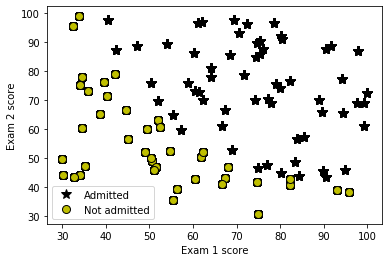

In [16]:
plotData(X, y)
# add axes labels
pyplot.xlabel('Exam 1 score')
pyplot.ylabel('Exam 2 score')
pyplot.legend(['Admitted', 'Not admitted'])
pass

In [17]:
def sigmoid(X):
   return 1/(1+np.exp(-X))

In [18]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [19]:
def costFunction(theta, X, y):
    
    #J=0
    m = y.size
    #grad = np.zeros(theta.shape)
    
    z = sigmoid(np.dot(X,theta))
    
    J = (1/m)*(-(np.dot(y.T,np.log(z)))-(np.dot((np.ones(m)-y).T,np.log(np.ones(m)-z))))
               
    grad = (1/m)*(np.dot(X.T,z-y))
    
    return J, grad

In [20]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


In [21]:
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


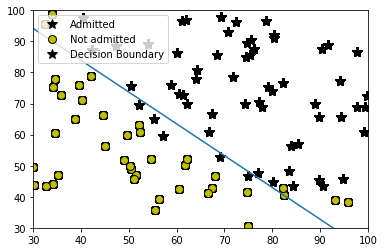

In [22]:
# Plot Boundary
utilsWeekThree.plotDecisionBoundary(plotData, theta, X, y)

In [23]:
def predict(theta, X):
    
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    # ====================== YOUR CODE HERE ======================

    for i in range(m):
        if sigmoid(np.dot(X[i,:],theta))>0.5:
            p[i]=1
            
        else:
            p[i]=0
    
    # ============================================================
    return p

In [24]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


In [25]:
url = 'https://github.com/IITGuwahati-AI/Learning-Content/raw/master/Phase%203%20-%202020%20(Summer)/Week%203(Apr%2013%20-%20Apr%2018)/Exercise2/Data/ex2data2.txt'
raw_data = urlopen(url)

# To read comma separated data
data = np.loadtxt(raw_data, delimiter=',')

X = data[:, :2]
y = data[:, 2]

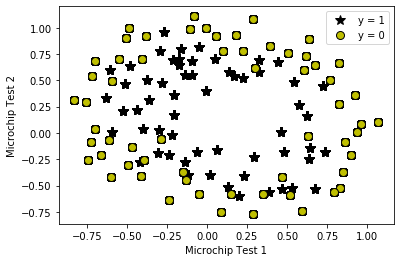

In [26]:
plotData(X, y)
# Labels and Legend
pyplot.xlabel('Microchip Test 1')
pyplot.ylabel('Microchip Test 2')

# Specified in plot order
pyplot.legend(['y = 1', 'y = 0'], loc='upper right')
pass

In [27]:
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = utilsWeekThree.mapFeature(X[:, 0], X[:, 1])

In [28]:
def costFunctionReg(theta, X, y, lambda_):

    m = y.size  # number of training examples
    
    z = sigmoid(np.dot(X,theta))
    
    J = (1/m)*(-(np.dot(y.T,np.log(z)))-(np.dot((np.ones(m)-y).T,np.log(np.ones(m)-z)))) +(lambda_/(2*m))*(np.dot(theta[1:-1].T,theta[1:-1]))
        
    grad = np.zeros(theta.shape)
    
    grad[0] = np.mean(z-y)
    
    for j in range(1,X.shape[1]):
        grad[j] = (1/m)*(np.dot(X[:,j].T,z-y))+(lambda_/m)*theta[j]
        
    return J, grad

In [29]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : 3.12
Expected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


In [30]:
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

TypeError: costFunctionReg() missing 1 required positional argument: 'lambda_'